# Introduction to discritized image representation and maps

## Why a satellite image?

If you've happened to scroll over this lesson you'll note that we're strting by looking at satellite images.  Surely, given that we're studying the brain, wouldn't it be more appropriate to look at an image of a brain?  If our goal was to jump straight in to learning about the brain, maybe, but as we noted earlier, our first goal is to learn about image formats.  While some of us may have been looking at pictures of the brain for years now--perhaps even decades--it's almost guarenteed have been looking at pictures of the world for far longer.  As such, we're beginning with pictures of the world, which we presumably have deeper-seated intuitions about.

In the following sections we'll consider how the actual data in the JPEG structure corresponds to things like oceans, forests and other types of [biomes](https://en.wikipedia.org/wiki/Biome).  We'll see how we can use our intuitions to bridge the gap between the raw data and our existing understanding of the world itself (i.e. the subject of the satellite photography).

Ultimately, what we will be illustrating are the processes of **spatial translation** (moving an object in space) and **masking** (the selection or "indexing" of related sub-components from a larger whole).  These concepts are introduced here in 2D using the sattilite image, but as later lessons will show, these concepts are central to our use of neuroimaging data.  As a primary example of this, when whe initially use an MRI scanner to obtain an image of a persons head, we also get data about the persons neck, head, skull and other tissues that *are not* the brain.  However, when we do our analyses, we only want to look at data that relates to the brain.  As such, we have to "**mask** out" those spatial regions of the scan data we are not interseted in.  Doing so ensures that we only extract data from the structures/areas of interest.  This lesson provides an introduction to this process with landmasses.

Lets begin by loading and plotting [a satellite image](https://commons.wikimedia.org/wiki/File:Earthmap1000x500.jpg) now.

In [1]:
#this code ensures that we can navigate the WiMSE repo across multiple systems
import subprocess
import os
#get top directory path of the current git repository, under the presumption that 
#the notebook was launched from within the repo directory
gitRepoPath=subprocess.check_output(['git', 'rev-parse', '--show-toplevel']).decode('ascii').strip()

#move to the top of the directory
os.chdir(gitRepoPath)

#file name of standard map of the world
firstMapName='Earthmap1000x500.jpg'

#file name of grayscale map of the world
grayscaleMapName='World_map_blank_without_borders.svg.png'

#file name of world map with "graticule" (lines)
#see https://en.wikipedia.org/wiki/Geographic_coordinate_system for more info
linedMapName='Equirectangular_projection_SW.jpg'

#file name of political world map
politicalMapName='2000px-Dünya.svg.png'

#loading image processing and manipulation package Pillow
# https://pillow.readthedocs.io/en/stable/
import PIL
from PIL import Image
import os
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np

firstMapPath=os.path.join(gitRepoPath,'images',firstMapName) 
firstMap= Image.open(firstMapPath)

#in order to display in jupyter, some trickery is necessary
%matplotlib inline
imshow(np.asarray(firstMap))
fig = plt.gcf()
fig.set_size_inches(15, 30)





ModuleNotFoundError: No module named 'pillow'

Here we see a satellite image of the world just like any other that you've seen before.  Note though, that it is bordered by numbered axes, with zeros in the upper (for the Y axis) and lower (for the X axis) left-hand corners. This is becase we have loaded it here in a jupyter notebook, which treats it just like any other pixel-wise plot that could be generated from code or data.  As such, the labeling numbers we see tracking the pixel rows in columns in the image.  From rom this plotting we can see that our code has loaded the image as a 500 pixel tall by 1000 pixel wide object.

Take note of how, specificially, the row and column numberings are associated with the plotted image.  We can see that the top row is labled zero, while the final row is unlabled, but nonetheless corresponds to 500.  Likewise, the first column is labeled zero, but the final (unlabeled) column is corresponds to 1000.  Though this method of orientation may feel unintuitive, this is how data is plotted with [matplotlib](https://matplotlib.org/) (the code library we are using to view these images).

Lets use some additional python functions to extract the "raw" data being used to generate this plot and examine it.  We'll begin by looking at the dimensions of the image according to the python function (which reports image dimensions), and we'll look at the dimensions of the underlying data itself.

**Do we expect these two entries to be the same or different?  Why or why not?

In [29]:
from __future__ import print_function
print(firstMap.format,firstMap.size , firstMap.mode)
print('')

firstMapArray=np.asarray(firstMap)
print('Dimensions of array')
firstMapShape=firstMapArray.shape
print(firstMapShape)
print('')

JPEG (1000, 500) RGB

Dimensions of array
(500, 1000, 3)



## JPEGs, color, and data dimensions

The **first output** we get reads as follows:

"JPEG (1000, 500) RGB"

This provides us with several details.  It comes from the python functions associated with loading and viewing images.

 - **JPEG**:  Indicates the file type, which could have also been PNG for example.
 - **(1000, 500)**: This quantity indicates the resolution of of the image.  The first number indicates how many pixels wide it is, while the second indicates how tall it is in pixels.
 - **RGB**:  Indicates the color component channels that are being combined to create the image.  Here we see that there are three of these channels and they correspond to the Red (R), Green (G), and Blue (B).

The **second ouput** reads as "(500, 1000, 3)" and indicates the dimensions of the image's *actual* data reprsentation.

Here we see that it is a **3** dimensional array.  This may come as a surprise given that the image is clearly **2** dimensional.  The first two values (500 and 1000) correspond to the height and width of the image, and are flipped from the output of the previous report.  This is something to be mindful of when investigating data structures, as the norms for ordering dimensions vary from function to function and programming language to programming language.  The final value, **(3)**, is something new though.  This corresponds to the aforementioned color channels for the image.  This value is 3 because this is an *RGB* based image.  Had the final entry of the first output been *CMYK* (Cyan Magenta Yellow Black) the size of the final dimension would have been 4 instead of 3.  Typically though, CMYK is used for printed (or to be printed) mediums.


#### Lets plot each of these color layers separately and take a look at the output.

We'll plot the red, green, and blue channels separately below, as though they were full maps in and of themselves.

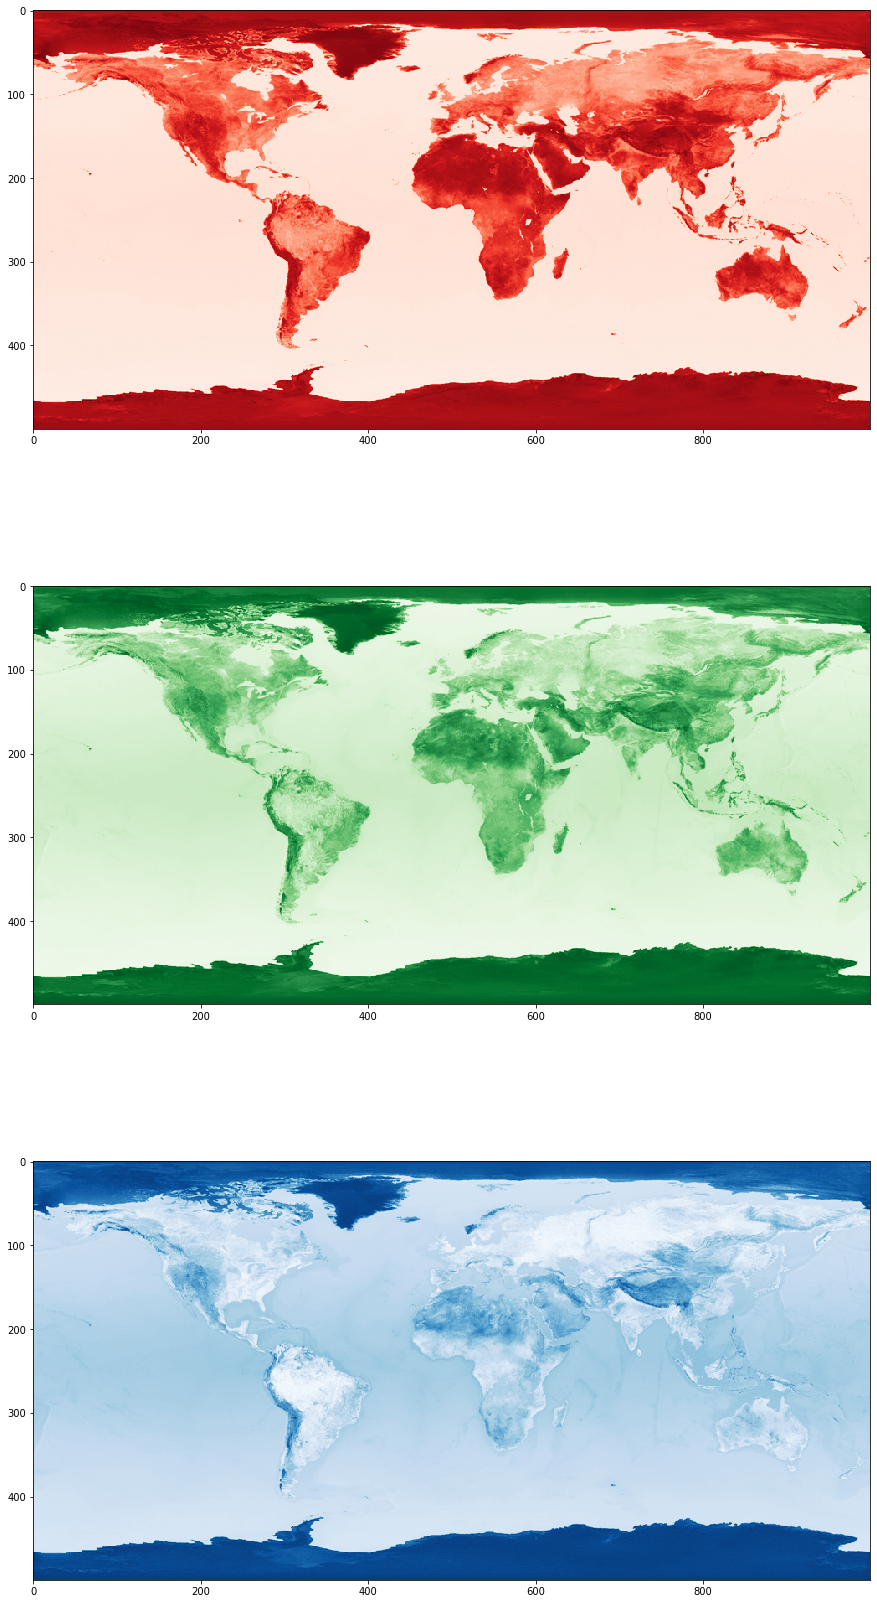

In [30]:
plt.subplot(3, 1, 1)
imshow(firstMapArray[:,:,0],cmap='Reds')
fig = plt.gcf()
fig.set_size_inches(15, 30)

plt.subplot(3, 1, 2)
imshow(firstMapArray[:,:,1],cmap='Greens')
fig = plt.gcf()
fig.set_size_inches(15, 30)

plt.subplot(3, 1, 3)
imshow(firstMapArray[:,:,2],cmap='Blues')
fig = plt.gcf()
fig.set_size_inches(15, 30)

##  Why three layers?

Each of these color layers looks somewhat similar but contain slightly different information.  For example, if you look closely at the red image, you'll notice that it does not exhibit the same equatorial "darkening" that the green and blue images do.  Other differences are visbile between green and blue images, though they are more subtle.  For example Lake Victoria (in the eastern part of central Africa, at about 600 X and 250 Y) is visible in the green channel but not in the blue channel.  Although these three channels are all carrying information about the world, they each constitute  distinct bodies of information.  This information is combined by our the setup of our computer monitors, and we perceive the resultant combination as the coherent depiction of the planet that we're all familiar with.


#### What happens when you look at a specific pixel across the color layers?

Lets look at the data stored across these three layers, in several specific pixels from the map:
 - the upper left of the map [0,0]
 - the atlantic ocean [450,400]
 - the United States [150,200]
 - Russia [80,700]
 - North Africa [180,550]
 
Below we'll index into the data structure for the pixels that were just listed, and then print out the information that is being stored with that pixel.

In [31]:
print('Upper left pixel RGB Value')
upLeftPixel=firstMapArray[0,0]
print(upLeftPixel)
print('')

print('Atlantic pixel RGB Value')
atlanticPixel=firstMapArray[450,400]
print(atlanticPixel)
print('')

print('US pixel RGB Value')
usPixel=firstMapArray[150,200]
print(usPixel)
print('')

print('Russia pixel RGB Value')
russiaPixel=firstMapArray[80,700]
print(russiaPixel)
print('')

print('North Africa pixel RGB Value')
northAfricaPixel=firstMapArray[180,550]
print(northAfricaPixel)
print('')

Upper left pixel RGB Value
[214 213 227]

Atlantic pixel RGB Value
[14 49 69]

US pixel RGB Value
[207 186 155]

Russia pixel RGB Value
[65 74 45]

North Africa pixel RGB Value
[204 170 125]



## What's in a pixel?

In the code block above we have querried the entries for the specified pixels and obtined these results:

 - [0,0], which is the upper leftmost pixel = [214 213 227]
 - [150,400], which is in the Atlantic = [14 49 69]
 - [150,250], which is in the middle of the United States = [207 186 155]
 - [80,700], which is in western Russia = [65 74 45]
 - [180,550], which is in north Africa = [204 170 125]

Below the label description for each pixel is the color value (between 0 and 255) for the red, green, and blue channels respectively.  A 0 would indicate no presence of the color, while a 255 would constitute the maximal presense of the color.

Thus, for each of these pixels we have obtained a 1 by 3 output, which corresponds to the RGB value for each pixel.  

#### Use the sliders below to enter in the values obtained for the pixels listed above in order to identify the corresponding colors
(NOTE: you can also simply enter the number beside the slider, rather than dragging it, if you prefer.)

#### What colors do you get for these points?
Use the color sliders for RGB values from the code below to determine what color corresponds to the selected pixels.  This will help you interpret what the numbers are actually indicating for that pixel.  You can use the sattilite image adjacent to the color plot to get a sense of where the color might be occuring in the image.

 - upper leftmost pixel   [214 213 227] : ?

 - Atlantic pixel            [14 49 69] : ?

 - middle of US pixel     [207 186 155] : ?

 - western Russia pixel      [65 74 45] : ?

 - north Africa pixel     [204 170 125] : ?

In [32]:
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import IntSlider
from ipywidgets import FloatSlider

#create blank structure for giant pixel display
bigPixel=np.zeros([300,300,3], dtype=int)

#update the output plot
def updatePlots(bigPixel):
    plt.subplot(1, 2, 1)
    imshow(bigPixel)
    fig = plt.gcf()
    fig.set_size_inches(10, 10)
    
    plt.subplot(1, 2, 2)
    imshow(np.asarray(firstMap))
    fig.set_size_inches(15, 10)

#update the big pixel data object
def updateBigPixel(redVal,greenVal,blueVal):
    bigPixel[:,:,0]=redVal
    bigPixel[:,:,1]=greenVal
    bigPixel[:,:,2]=blueVal
    updatePlots(bigPixel)
    
# create the interactive objects
redVal=FloatSlider(min=0, max=255, step=1,continuous_update=False)
greenVal=FloatSlider(min=0, max=255, step=1,continuous_update=False)
blueVal=FloatSlider(min=0, max=255, step=1,continuous_update=False)

#establish interactivity
interact(updateBigPixel, redVal=redVal,greenVal=greenVal,blueVal=blueVal) 

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='redVal', max=255.0, step=1.…

<function __main__.updateBigPixel(redVal, greenVal, blueVal)>

Ultimately, you should get obtain the colors presented in the swatches below, which are the pixel colors plotted along large vertical swath.  Each color swatch corresponds to the color of the respective pixel.

#### What are the colors for these pixels?

1.  upper leftmost pixel:  ?
2.  Atlantic pixel:  ?
3.  (midwest) United States pixel :  ?
4.  (western) Russia pixel:  ?
5.  (north) Africa pixel:  ?


(300, 500, 3)


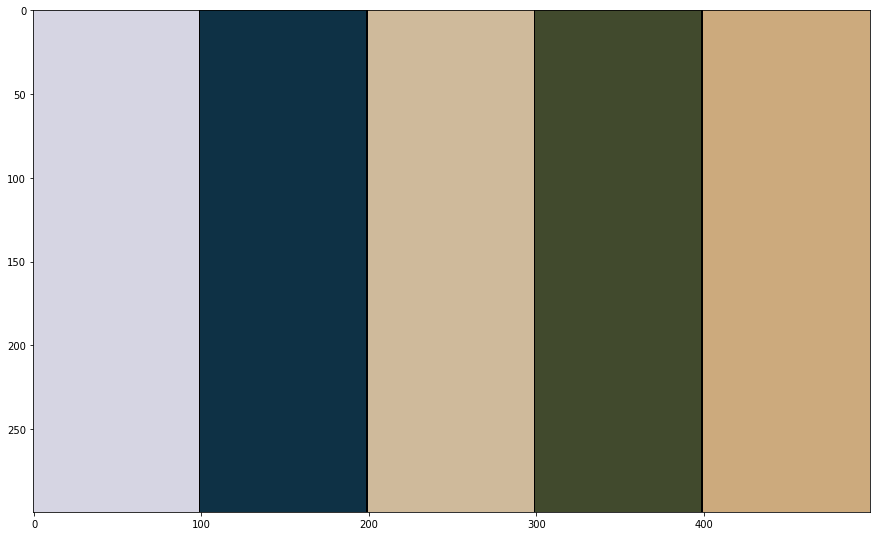

In [33]:
#create empty array
colorArray=np.zeros([300,500,3], dtype=int)
print(colorArray.shape)

#begin painting the array, remember 0 indexing
colorArray[0:300,0:99,:]=upLeftPixel.astype(int)
colorArray[0:300,100:199,:]=atlanticPixel.astype(int)
colorArray[0:300,200:299,:]=usPixel.astype(int)
colorArray[0:300,300:399,:]=russiaPixel.astype(int)
colorArray[0:300,400:500,:]=northAfricaPixel.astype(int)

%matplotlib inline
imshow(colorArray)
fig = plt.gcf()
fig.set_size_inches(15, 30)

##  The color of data

You should get approximately the following colors:

 - upper leftmost pixel                  : Ice white

 - Atlantic pixel                        : Blue

 - middle of the United States pixel     : Light brown

 - western Russia pixel                  : Green

 - north Africa pixel                    : Yellow-orange

Given that our JPEG above is of a geographic satellite map of the world, these colors correspond to the color (refleted visible light) of the surface of the earth in that area (As viewed from space, roughly speaking).  With this information we can make educated guesses as to the types of environments associated with each of these locations using the color information.

#### What types of environments are found at each of these pixels?
(feel free to leverage the location information provided with the label/description of the pixel's source)

We'll plot the subsection of the satellite image surrounding the pixel below, in order to provide you with a bit of context related to what the pixel represents. 

(99, 499, 3)


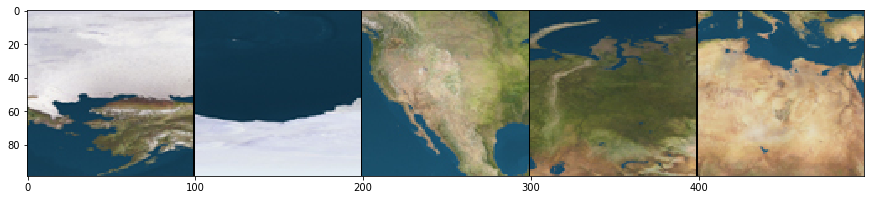

In [34]:
#create empty array
sectionArray=np.zeros([99,499,3], dtype=int)
print(sectionArray.shape)

#remember the sources
#upLeftPixel=firstMapArray[0,0]
#atlanticPixel=firstMapArray[450,400]
#usPixel=firstMapArray[150,250]
#russiaPixel=firstMapArray[80,700]
#northAfricaPixel=firstMapArray[180,550]

#begin painting the array, remember 0 indexing, extracting 100x100 squares from origional image
sectionArray[0:99,0:99,:]=firstMapArray[0:99,0:99,:]
sectionArray[0:99,100:199,:]=firstMapArray[400:499,350:449,:]
sectionArray[0:99,200:299,:]=firstMapArray[100:199,150:249,:]
sectionArray[0:99,300:399,:]=firstMapArray[30:129,650:749,:]
sectionArray[0:99,400:499,:]=firstMapArray[130:229,500:599,:]

%matplotlib inline
imshow(sectionArray)
fig = plt.gcf()
fig.set_size_inches(15, 30)

##  A biome's color

|    **Label/Description** | **Color** | **Biome** |
| --- | --- | --- |
| _upper leftmost pixel_ | White | Ice | 
| _Atlantic_ | Blue | Ocean |
| _middle of the United States_ | Yellow | Plains | 
| _western Russia_ | Green | Forests |
| _north Africa_ | Orange | Desert | 

As we can see, its pretty straightforward to infer the envornment type from the color of the pixel.  Keep in mind that, although we are abstracting from the visible color (a visible property resulting from the RGB value information represented) to a color name (a categorical label), we've essentially applied this environmental label in virtue of a quantative property, specifically the RGB value.  This is a *very* interesting capability, particularly when we describe it a bit more generally:

We can **systematically** apply a **categorical label** using **quantative information**

#### How might we use this here with the satellite data?
Consider for a moment the sorts of things we could now do with the data from our satellite image.

One thing you might wonder is:

#### Can we select all of the pixels that correspond to a specific biome?

Well, yes.  Although some environment types exhibit variability in their coloring (in that they exhibit a range of RGB color values), others are fairly homogenous, and therefore easier to find systematically.  

#### Which environment is the most homogenous?
Which environment type would be covered by the narrowest range of color values?

#### How would create a rule, or series of rules (i.e. an *algorithm*), to find all of the image pixels that correspond to this environment type?
How would you, based on the numerical RGB values, decide whether or not a specific pixel is of the specified environment type?

####  A potential target?

The ocean appears to be the most homogenous of the various environment types.

####  Can we find all pixels of that type?

Well, before we can actually try to do this, we first have to determine which data point--which specific pixel--we will treat as *the* quintessential ocean color.  In essence, this should be the "average" ocean color, that is, the middle-ground between all ocean pixels.  For our purposes we can just stick with the color we selected for the Atlantic pixel.  However, we should keep in mind that this will also pick up fresh water bodies as well, as their color properties aren't vastly different from the oceans.

Lets go ahead and set the color of that pixel (14 49 69) as a variable and then count how many pixels that particular color value corresponds to.  

We'll print out the number of possible pixels below, along with the number that matched the variable we set.  Keep in mind that what we're counting here are those pixels that *exactly* that color.

#### How many pixels do you expect this to be?
We know that the ocean covers approximately 71 percent of the earth's surface.  How many pixels from the image do we expect this to correspond to if the total number of pixels in the image is 1000\*500=500,000?


In [35]:
print('Atlantic pixel RGB')
#equitorial blue
#atlanticColor=firstMapArray[150,400]

#nonequator blue
#atlanticColor=firstMapArray[400,200]

#artic blue
atlanticColor=firstMapArray[450,400]
print(atlanticColor)
print('')

#subtract atlantic blue from the pixel data.  0 values indicate equivalence
zeroBlueMask=np.subtract(firstMapArray,atlanticColor)
#sum the total color difference, we use absolute to avoid strange edge cases where the distance from blue sums to 0
blueDiffSum=np.sum(np.absolute(zeroBlueMask),axis=2)

#[Atlantic blue - Atlantic blue] = 0 , so the zeros we find indicate the exact matches
#anything else is a different color
exactColorMask=[blueDiffSum==0]

#counts the number of nonzero (not false) values in mask array
totalExact=np.count_nonzero(exactColorMask)

#extract the image dimensions from the image dimenion variable obtained earlier
imgDimY=np.asarray(firstMapShape[0])
imgDimX=np.asarray(firstMapShape[1])

print('Total number of pixels in satellite .jpeg image:')
print([imgDimY*imgDimX])
print('')

print('Number of pixels EXACTLY equal to atlantic pixel color value:')
print(totalExact)
print('')

print('Proportion of total pixels:')
print(np.divide(totalExact,[imgDimY*imgDimX]))
print('')

print('Percentage of total pixels:')
print(np.divide(totalExact,[imgDimY*imgDimX])*100)
print('')

Atlantic pixel RGB
[14 49 69]

Total number of pixels in satellite .jpeg image:
[500000]

Number of pixels EXACTLY equal to atlantic pixel color value:
1031

Proportion of total pixels:
[0.002062]

Percentage of total pixels:
[0.2062]



### An unexpected result?

First thing to note: 1031 is a relatively small proportion of 500,000.  If the earth's surface is 71% water, why didn't we get anything remotely close to that with our previous result?  We didn't even get 1%!

#### A possible explanation?

One thing to consider is that there are a lot of different combinations of colors that could represent water.  Indeed, there's a decent amount of variability visible in the initial satellite image--it's not just one color.  Given how we were couting pixels, if a value was off by even one unit (for any of the color channels!), it wouldn't have been counted above.  This explains how we only got about .2 % of the surface pixels--only .2% of the pixels on the map *exactly* match the pixel we chose.

#### So how do we find the remaining 70.8% of pixels?

Our "naive", semi-mathematical method for finding pixels that were the exactsame as "Atlantic blue" provides a big hint as to how we could acheive this.  

#### How did we count the number of "Atlantic blue" pixels?
(look back at the preceeding code block and use the commented code to see how the "search" (for matches) and count was implemented)

### Checking our math

Our total count was reported by printing the contents of the **totalExact** variable.  This variable, in turn was computed by counting the number of non-zero entries in the **exactColorMask** variable.  What was stored in the **exactColorMask** variable and how was it generated? 

**exactColorMask** was generated by subtracting the "Atlantic blue" RGB value [14 49 69] from *each* pixel in the original image and then (after summing the absolute value of this difference across all three color channels) looking for pixels which had **no** difference (i.e. were **exctly** 0).  

Thus in pixels that were *precisely* "Atlantic blue" we had  the following computational/mathematical situation:  

[Atlantic blue]-[Atlantic blue] == [14 49 69] - [14 49 69] = [0 0 0]

and subsequently, 

sum([0,0,0])=0

There is no difference in any of the RGB channels in this specific case.  As such, we were able to sum across the third dimension (the color channel dimension) and thereby find the pixels without any difference.  Keep in mind that, although the colors represented by [14 49 70] and [14 50 69] may not be distinguishable by our eyes, this method would return a nonzero value in the second case.  For our exact match-based algorithm this would be enough to signal a difference.  In an "off-by-one" case like this our algorithm would not include that pixel in our count of "Atlantic blue" pixels.

#### How can we include pixel colors that are "nearby" Atlantic blue [14 49 69] in our count?
That seems a bit harsh.  Do we really need to throw out color values that are "close" to our Atlantic blue color?  Is there a way we could include pixel colors like [14 49 70] or [14 48 69] in our count of water pixels?

Well, the answer to these questions depends on our ability to systematically define (i.e. operationalize) the notion of "close" we are referring to here.

#### How can can we define "close" in a math-like way?

##  Using trigonometry to compute color distances

When we ran the "Atlantic blue" algorithm described above, we essentially treated the output as binarized.  What is meant by this is that that the answer to our question ("Is this Atlantic blue") was either **Yes** or **No**--there was no middle ground to the potential answers to this question.  The *only* case in which the answer wasn't **No**  was when the "difference" between "Atlantic blue" and the pixel in question was *exactly* zero.  To rephrase this question as a pseudo-code if statement:

"Is this Atlantic blue" --> if "Atlantic blue"-currentPixel==0, **yes**, otherwise **no** 

However, keen eyes will note that the most direct output of our method (the initial subtraction result, stored in the variable **zeroBlueMask**) *is not* actualy binarzed.  That is, we don't *actually* get only "yes" or "no" answers from the difference computation. Instead, we apply an additional computations to the **zeroBlueMask** (and store the results in **blueDiffSum** and **exactColorMask**).  

**Is there something in zeroBlueMask that we can make use of to determine "close" colors?"

#### What do we actually get from "zeroBlueMask=np.subtract(firstMapArray,atlanticColor)"

Instead of storing 1 or 0 (binary "Yes/TRUE" or "No/False"), for each pixel, it's a 1x3 vector that corresponds to the mathematical difference between the RGB values for "Atlantic blue" and that the RGB values for the relevant pixel. When all of these differeces are stored in the same arrangment as the original image, we get a very familiar output when we check the dimensions of this structure (**zeroBlueMask**)

In [36]:
print('Dimensions of zeroBlueMask variable:')
print(np.asarray(zeroBlueMask).shape)

Dimensions of zeroBlueMask variable:
(500, 1000, 3)


In 1031 cases (i.e. for 1031 pixels) the difference between the "Atlantic blue" value [14 49 69] is [0 0 0]--zero for each color channel. However, for [14 49 70] it would be [0 0 1] and for [14 48 69] it would be [0 -1 0].

We can think about those colors as being "1" away from "Atlantic blue".  How many pixels are "off-by-one" like this?  To check this, we would need to look at the **blueDiffSum** variable, which has summed the cross-channel differences into a single value.  In this 2 dimensional structure, we would be looking for values equal to 1.

NOTE: in the code block below, you'll note that the variable **offByValue** is set to 2.  This is despite our immediately preceeding discussion focusing on pixels that were "off-by-one".  The reason for this discrepancy is that, as it turns out, there are no pixel values that are *just* one numerical value off from the "Atlantic blue" value we are looking for.  As such, in order to find *any* additional pixels, we have to increase this "off-by" number (below represented by the **offByValue** variable) to 2.  The likely cause of this is a phenomenon known as "JPEG compression" which is a specialized process used by image handling & processing programs which attempts to "shrink" the storage size of the image by algorithmically recoloring nearby pixels.  The exact mechanism behind this process is beyond the scope of this lesson, but feel free to do a search on one's own to find out more.

In [37]:
print('Dimensions of blueDiffSum variable:')
print(np.asarray(blueDiffSum).shape)
print('')

#here we set the offByValue
#feel free to play with this value 
offByValue=2

#here we modify a computation we used earlier.  Before we were looking for blueDiffSum==0
#now we are looking for the value specified by offByValue
offBySomeColorMask=[blueDiffSum==offByValue]

#counts the number of nonzero (not false) values in off-by-some mask array
totalOffBySome=np.count_nonzero(offBySomeColorMask)

print('Number of pixels off by a few from atlantic pixel color value:')
print(totalOffBySome)
print('')

print('Proportion of total pixels off-by-some:')
print(np.divide(totalOffBySome,[imgDimY*imgDimX]))
print('')

print('Percentage of total pixels off-by-some:')
print(np.divide(totalOffBySome,[imgDimY*imgDimX])*100)
print('')


Dimensions of blueDiffSum variable:
(500, 1000)

Number of pixels off by a few from atlantic pixel color value:
86

Proportion of total pixels off-by-some:
[0.000172]

Percentage of total pixels off-by-some:
[0.0172]



#### A rough first step
In the above code block, we counted how many pixels were off by some small amount (default=2) from the "Atlantic blue" color value.  Note that, algorithmically speaking, we were kind of doing this in a rough fashion:  we were simply summing the differences from the specified RGB values across all dimensions.  This was not a particularly sophisticated method and it treats some distance senarios (i.e. [1 1 1] and [0 0 3]) as the exact same, even though these are "different kinds of differences".  That being said, it does hint a structured framework for considering these color differences.

#### Can we generalize this concept?
If we think about this a bit more geometrically, we could treat the RGB values as the axes of an XYZ plot.  In such a fashion, each color could be placed in this arrangment in accordance with their X (red), Y (green), and Z (blue) coordinates.  Colors could then have their "distance" computed by seeing how far away they are from one another in this spatial arrangement.  In this way we would be computing the *hypotenuse* formed the 3 dimensional right triangle formed by the differences in color values.  The formula would look roughly like this

"Color Hypotenuse Distance"=$\sqrt{(R^2 +G^2 + B^2 )}$

where 

R="Red Difference"=RedVal1-RedVal2  
G="Green Difference"=GreenVal1-GreenVal2  
B="Blue Difference"=BlueVal1-BlueVal2  

This constitutes a good method we can systematically use to compute pixels' color distance from "Atlantic blue"!

Lets impliment some code that does exactly this.  Next, we'll apply that code compute the color distance from the "Atlantic blue" value.  After that, we will then plot a histogram of these differences to get a sense of the distribution of color distances from "Atlantic blue" in the image.  Finally we'll also look at these distances mapped on to the original satellite image to get a sense of where these differences (and similarities) are occuring.

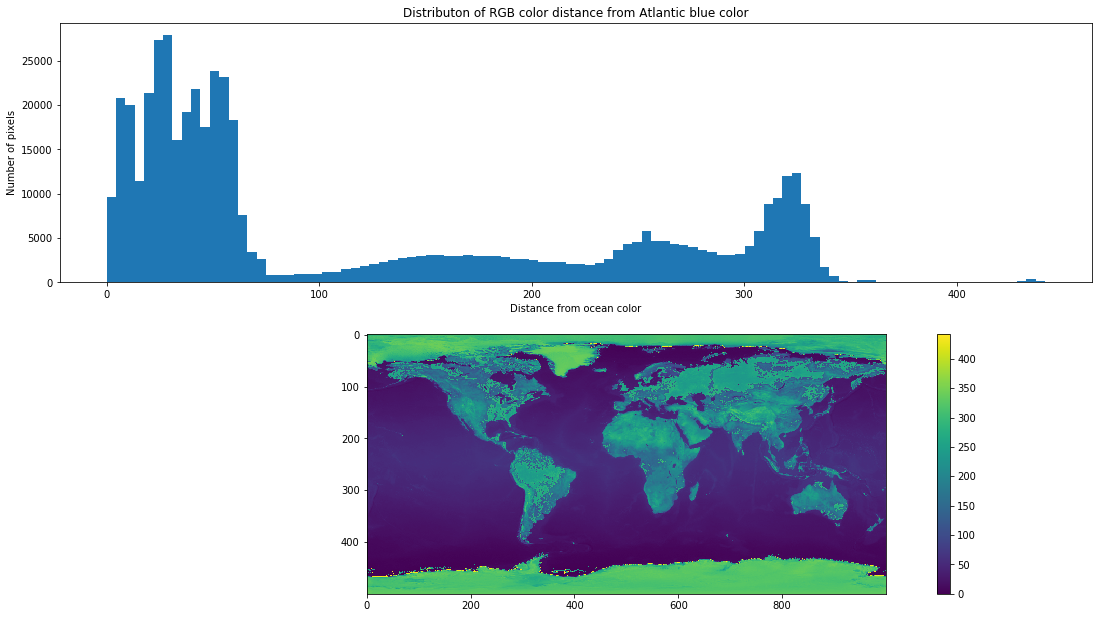

In [42]:
import numpy as np
import matplotlib.pyplot as plt

#quick and dirty general use hypoteuse algorithm, can be used for 2d or 3D
def multiDHypot(coords1,coords2):
    dimDisplace=np.subtract(coords1,coords2)
    elementNum=dimDisplace.size
    elementSquare=np.square(dimDisplace)
    elementSquareSum=np.sum(elementSquare)
    if elementNum==1:
        hypotLeng=dimDisplace
    elif elementNum==2:
        hypotLeng=np.sqrt(elementSquareSum)
    elif elementNum==3:
        hypotLeng=np.sqrt(elementSquareSum)
    return hypotLeng

#initalize distance storage structure
colorDistMeasures=np.zeros(([firstMapShape[0],firstMapShape[1]]))

#iteratively apply the distance computation
for iRows in range(firstMapShape[0]):
    for iColumns in range(firstMapShape[1]):
        #extract the current pixel
        curPixelVal=zeroBlueMask[iRows,iColumns]
        
        #compute the color distance for this pixel, and store it in the corresponding stpot
        #in colorDistMeasures, use this if your input above was firstMapArray
        #Sidenote:  This may require additional code modifications
        #colorDistMeasures[iRows,iColumns]=multiDHypot(curPixelVal,atlanticColor)
    
        #compute the color distance for this pixel, and store it in the corresponding stpot
        #in colorDistMeasures, use this if your input above was zeroBlueMask
        #we use [0 0 0 ] as our input because zeroBlueMask has already had the atlantic blue
        #subtracted from it
        colorDistMeasures[iRows,iColumns]=multiDHypot(curPixelVal,[0, 0, 0])

#data structure formatting for plotting
flattenedDistances=np.ndarray.flatten(colorDistMeasures)

#plotting code for histogram
ax1=plt.subplot(2, 1, 1)
#NOTE: To get a visual sense of the aforementioned JPEG color coompression, set bins = 500 
#in the next line.
plt.hist(flattenedDistances, bins=100)
plt.xlabel('Distance from ocean color')
plt.ylabel('Number of pixels')
plt.title('Distributon of RGB color distance from Atlantic blue color')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

#plotting code for geography plot
ax2=plt.subplot(2, 1, 2)
heatPlot=plt.imshow(colorDistMeasures)
fig2=plt.gcf()
fig2.colorbar(heatPlot)

##  Visualizing color distances

Above are the two plots that are generated by the preceeding code.  The first of these plots the distribution of color distances from "Atlantic blue" found in the satellite image.  Thus, in total, the various bars of this graph should collectively represent distance calculations from all 500 x 1000 = 500,000 pixels.  From this same histogram plot we can also see that there appear to be three or four partially overlapping "clusters":

-   0    to  ~75
-  ~100  to  ~230
-  ~230  to  ~290
-  ~300  to  ~340

These likely correspond to colors/environment-types that cover large portions of the Earth.  

#### The big cluster, from 0 to 75 is the one we are intested in, and to see why we can look at the plot below the histogram.

In the plot below the histogram we see a differently colored view of the satellite image.  Here, instead of visible light, we are plotting the numerical color distance from "Atlantic blue".  Referencing the colorbar to the right, we see that most of the ocean is less than 100 "distance units" from the "Atlantic blue" color.  

What if we selected only those pixels that were *less than* some specified distance (e.g. 75 or 100) from "Atlantic blue"?

#### What's the ideal distance from "Atlantic blue" to capture as many water pixels as possible and as few land pixels as possible?

Below we'll establish a threshold value for selecting the pixels of interest.  Use the slider bar to move the threshold along the histogram.  Pixels that are *less than* the specified color distance from "Atlantic blue" will be displayed in **yellow**, while those that are *greater than* the specified color distance will be displayed in **blue-purple**.  Your goal is to select the ideal threshold value that best (and most selectively) finds water pixels.  There are multiple ways to manipulate the slider:  You can use your mouse directly, you can use the arrow keys of your keyboard, or you can enter a number directtly.

In [43]:
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import IntSlider
from ipywidgets import FloatSlider

#function for modifying the plot via the input cutVal
def updatePlots(DistanceArray,cutVal):

    #modify input data structure
    flattenedDistances=np.ndarray.flatten(DistanceArray)
    
    #set plot features for histogram with cutVal line
    plt.subplot(3, 1, 1)
    plt.hist(flattenedDistances, bins=100)
    plt.xlabel('Distance from ocean color')
    plt.ylabel('Number of pixels')
    plt.title('Distributon of RGB color distance from Atlantic pixel color')
    xposition = [cutVal]
    for xc in xposition:
        plt.axvline(x=xc, color='r', linestyle='--', linewidth=3)
    fig = plt.gcf()
    fig.set_size_inches(20, 10)
     
    #compute binarized mask for values below cutVal
    naieveOceanMask=DistanceArray<cutVal
    
    #plot the image that results
    plt.subplot(3, 1, 2)
    imshow(naieveOceanMask)
    fig = plt.gcf()
    fig.set_size_inches(10, 10)
    
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    maskLabels = 'Presumed water', 'Presumed land'
    maskSizes = [np.sum(naieveOceanMask==1),np.sum(naieveOceanMask==0)]
    #implement pie chart plot here

#create the function to manipulate
def updateCut(cutVal):
    updatePlots(colorDistMeasures,cutVal)

#establish the cutVal variable
cutVal=FloatSlider(min=np.min(flattenedDistances), max=np.max(flattenedDistances), step=1,continuous_update=False)

#establish interactivity
interact(updateCut, cutVal=cutVal) 

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='cutVal', max=441.6729559300…

<function __main__.updateCut(cutVal)>

**NOTE: Make sure your mask is good before continuing to subsequent sections**

## Making an ocean mask

Above, you've used the slider bar to try and select a color distance value which isolates just the water pixels.  The histogram plot is the same as the one from the previous cell, however the red bar indicates where in the distribution your current threshold is.  The second plot is the "mask" that you've created, in which **yellow** pixels indicate all of those pixels whose color distance is **less** than the threshold value you've set and the **purple-blue** pixles indicate all of those pixels whose color distance is **greater** than the threshold value you've set.  In this way, the yellow pixels represent those pixels that you deem suffecently close to "Atlantic blue", while the purple-blue ones are deemed too far from "Atlantic blue" to plausably be considered water pixels.

#### What is the ideal threshold value?

Additionally, as you move the threshold around (beyond what would be needed to make an ocean mask), you can observe which portions of the map go from blue to yellow, and thereby get a sense of what the clusters might represent.

#### What might the histogram clusters correspond to?

#### Some good guesses as to what the clusters correspond to:

-    0    to  ~75    = water
-   ~100  to  ~230   = grasslands, lighter forests
-   ~230  to  ~290   = mountians, darker forests, & deserts
-   ~300  to  ~340   = ice

#### A good guess as to the best threshold value

A value between 63 and 80 seems to do well for selecting water, see which one you feel works best.

In this lesson we practiced with the creation of a mask using a threshold value on our image.  In the next lesson, we'll try and compare the mask we generated to a preexisting mask of the planet's water.  What we'll learn is that before the comparison can even be made, a bit of adjustment needs to be made, in order to ensure correspondance between the two images.  This will prove to be a very important insight, as this process of ensuring correspondance between two images is central to digital investigations of brain anatomy.